In [21]:
# load all libraries

import numpy as np
# for plotting images
import matplotlib.pyplot as plt
# open cv for loading images
import cv2
# import os to traverse through the directory of images
import os
# for PCA
from sklearn.decomposition import PCA

In [22]:
# function to load images from the provided path
# returns an array of numpy arrays of images
def load_images(dir,count=-1):
    load_images_images = []
    for dirName, subdirList, fileList in os.walk(dir):
        print('Found directory: %s' % dirName)
        load_images_x = 0
        for fname in fileList:
            if(not count== -1 and load_images_x == count):
                break
#             print('%s/%s' % (dirName,fname))
            if(not '.png' in fname):
                continue   
            im = cv2.imread('%s/%s' % (dir,fname),cv2.IMREAD_COLOR)  # ,0 for gray scale # cv2.IMREAD_COLOR
#             im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
            load_images_images.append(im)
            load_images_x +=1
    print('----------')
    print(len(load_images_images))
    return load_images_images
        
images = load_images('/Users/alimurtazashaikh/projects/data',4000)

Found directory: /Users/alimurtazashaikh/projects/data
----------
4000


In [23]:
print(images[0].shape)

(64, 64, 3)


In [24]:
# function to process images from the provided image array
# returns an array of numpy arrays of images
def process_images(images):
    process_images_image_nparr = []
    for image in images :
        process_images_image_nparr.append(image.flatten()/255) # convert from 0-255 to 0-1
    process_images_image_nparr = np.array(process_images_image_nparr)
    return process_images_image_nparr

images = process_images(images)
print(images)

[[1.         1.         0.98431373 ... 0.81568627 0.85490196 0.95294118]
 [0.99215686 0.99607843 0.99607843 ... 0.52941176 0.6        0.8745098 ]
 [0.81568627 0.96078431 0.99607843 ... 0.62745098 0.62745098 0.87843137]
 ...
 [0.9254902  0.88235294 0.99607843 ... 0.82352941 0.77647059 0.98039216]
 [0.99215686 1.         1.         ... 0.21176471 0.17647059 0.18431373]
 [0.45490196 0.46666667 0.49803922 ... 0.39215686 0.43137255 0.74509804]]


In [25]:
print(images.shape)

(4000, 12288)


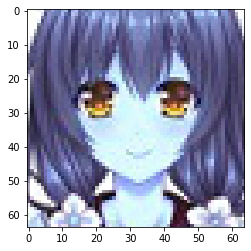

In [26]:
# show an image before PCA
imgplot = plt.imshow(np.reshape(images[0],(64,64,3)))

In [27]:
# time to PCA 
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
pca = PCA(100).fit(images)

In [28]:
print(pca.components_.shape)

(100, 12288)


In [29]:
print(pca.components_)

[[-0.00357916 -0.00486859 -0.00511386 ... -0.00636505 -0.00683251
  -0.00687102]
 [ 0.00394757  0.00456048  0.00459509 ... -0.01275229 -0.01317483
  -0.01029461]
 [-0.01599468 -0.01555619 -0.01039889 ...  0.01504923  0.01669218
   0.01609412]
 ...
 [ 0.0043172   0.00636354  0.00860051 ... -0.00272051 -0.01318213
  -0.01967422]
 [-0.01178222 -0.01077788 -0.01192822 ...  0.02147807  0.01708166
   0.01987231]
 [ 0.01490125  0.01146823  0.00705195 ... -0.00703983  0.00338739
   0.0085382 ]]


In [30]:
print(len(pca.components_))

100


In [31]:
print(pca.mean_)

[0.74810196 0.74880588 0.80680882 ... 0.68097451 0.67149216 0.72813431]


In [32]:
print(pca.mean_.shape)

(12288,)


In [33]:
reshaped_mean = np.reshape(pca.mean_,(64,64,3))

In [34]:
print(reshaped_mean.shape)

(64, 64, 3)


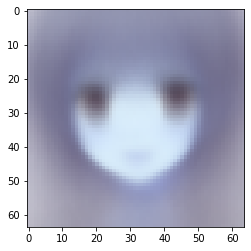

In [35]:
# image of average anime face
imgplot = plt.imshow(reshaped_mean)

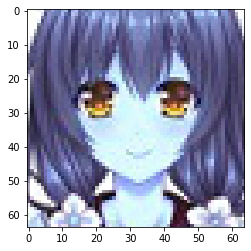

In [36]:
# show an image after PCA
imgplot = plt.imshow(np.reshape(images[0],(64,64,3)))

In [37]:
# transform average anime face to pca dimension
pca_average_face = pca.transform([pca.mean_])
print(pca_average_face)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]


In [38]:
# inverse transform average face
avg_face_inv_transform = pca.inverse_transform(pca_average_face)
print(avg_face_inv_transform)

[[0.74810196 0.74880588 0.80680882 ... 0.68097451 0.67149216 0.72813431]]


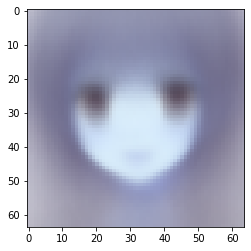

In [39]:
# image of inverse transform average face
imgplot = plt.imshow(np.reshape(avg_face_inv_transform[0],(64,64,3)))

In [40]:
# messing with the average pca transform - let's see what we get
mess_with_me = np.copy(pca_average_face)

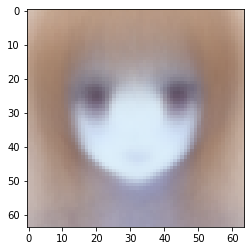

In [41]:
mess_with_me[0][1]=0
mess_with_me[0][2]=0
mess_with_me[0][3]=10
# print(mess_with_me)

# image of inverse transform of the messed up average pca
mess_with_me_inv_transform = pca.inverse_transform(mess_with_me)
imgplot = plt.imshow(np.reshape(mess_with_me_inv_transform[0],(64,64,3)))

In [42]:
# train method (image_dir, model_dir)
    # load images
    # process images
    # run pca
    # save model
# demonstrate method (image_dir, model_dir)
    # load model
    # show average image
    # transform average, add/sub to transformed value and then reverse transform and show the result
    # interactive UI to play with the transformation

In [43]:
from joblib import dump, load
dump(pca, '../models/pcatest.joblib') 

['../models/pcatest.joblib']

In [44]:
pca2 = load('../models/pcatest.joblib')

In [45]:
print(pca2.mean_)

[0.74810196 0.74880588 0.80680882 ... 0.68097451 0.67149216 0.72813431]


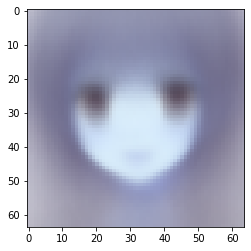

In [46]:
imgplot = plt.imshow(np.reshape(pca2.mean_,(64,64,3)))

In [47]:
pca2_mean_img = np.reshape(pca2.mean_,(64,64,3))

In [48]:
# just a check to make sure there is no negative value in the array
print(True in (pca2_mean_img < 0))

False


In [49]:
pca2_mean_img *=255
print(pca2_mean_img)

[[[190.766   190.9455  205.73625]
  [185.118   185.37275 201.314  ]
  [178.10325 178.75525 196.1035 ]
  ...
  [159.6045  157.261   179.259  ]
  [165.4585  163.1755  183.8305 ]
  [172.67    170.46825 189.93025]]

 [[187.38125 187.415   203.32275]
  [181.197   181.5     198.305  ]
  [174.9045  175.7355  193.89375]
  ...
  [155.71825 153.53675 176.3605 ]
  [162.4115  160.0675  181.32775]
  [168.98725 166.62375 186.81575]]

 [[184.21925 184.35725 200.9215 ]
  [177.93925 178.46225 196.15325]
  [171.8485  172.84    191.60975]
  ...
  [152.55725 150.43225 173.833  ]
  [158.77775 156.42125 178.49775]
  [165.8035  163.4165  184.46675]]

 ...

 [[189.584   187.94125 200.64625]
  [187.0995  185.38875 198.149  ]
  [183.036   181.37    194.92325]
  ...
  [169.84575 166.54375 181.72025]
  [171.55925 168.60925 183.81575]
  [173.3145  170.54    185.484  ]]

 [[189.2565  187.51075 200.143  ]
  [186.02125 184.31025 197.21975]
  [182.64775 180.90225 194.36725]
  ...
  [169.30425 166.2835  181.3875 ]
  [1